In [1]:
#| echo: false
#| warning: false
library(tidyverse)
options(repr.matrix.min.rows = 6)
options(tibble.print_min = 6)

library(ggthemr)
ggthemr("light") #, layout = "minimal")
theme_set(theme_get())
theme_update(panel.background = element_rect(fill = "white"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [67]:
helping <- read_csv("data/altruism_full.csv")

Rows: 168 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): status, sex
dbl (4): id, empathy, public_sc, helping

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [68]:
helping <- helping |>
    mutate(
        status = factor(status, levels = c("low", "high")),
        sex = factor(sex)
    )

helping |> print()

# A tibble: 168 × 6
     id status sex    empathy public_sc helping
  <dbl> <fct>  <fct>    <dbl>     <dbl>   <dbl>
1     1 high   female    58.1      88.3   33.8 
2     2 low    female    43.9      29.8   63.8 
3     3 low    female    76.8      80     61.0 
4     6 high   male      42.6      45.2    1.23
5     8 low    male      80.6      52     20.8 
6     9 high   male      44.2      69.2    7.61
# … with 162 more rows


In [69]:
summary(mod <- lm(helping ~ public_sc * status + empathy, data = helping))


Call:
lm(formula = helping ~ public_sc * status + empathy, data = helping)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.117 -14.950  -1.137  15.982  48.022 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.3143    11.9954  -0.026  0.97913    
public_sc             -0.2133     0.1689  -1.263  0.20849    
statushigh           -40.9460    17.0374  -2.403  0.01737 *  
empathy                0.7392     0.1510   4.895 2.35e-06 ***
public_sc:statushigh   0.6423     0.2203   2.916  0.00405 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.68 on 163 degrees of freedom
Multiple R-squared:  0.293,	Adjusted R-squared:  0.2756 
F-statistic: 16.88 on 4 and 163 DF,  p-value: 1.335e-11


In [73]:
summary(mod <- lm(helping ~ scale(public_sc) * status + empathy, data = helping))


Call:
lm(formula = helping ~ scale(public_sc) * status + empathy, data = helping)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.117 -14.950  -1.137  15.982  48.022 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -16.3357    11.1328  -1.467  0.14421    
scale(public_sc)             -3.4988     2.7708  -1.263  0.20849    
statushigh                    7.3082     3.5847   2.039  0.04310 *  
empathy                       0.7392     0.1510   4.895 2.35e-06 ***
scale(public_sc):statushigh  10.5379     3.6139   2.916  0.00405 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.68 on 163 degrees of freedom
Multiple R-squared:  0.293,	Adjusted R-squared:  0.2756 
F-statistic: 16.88 on 4 and 163 DF,  p-value: 1.335e-11


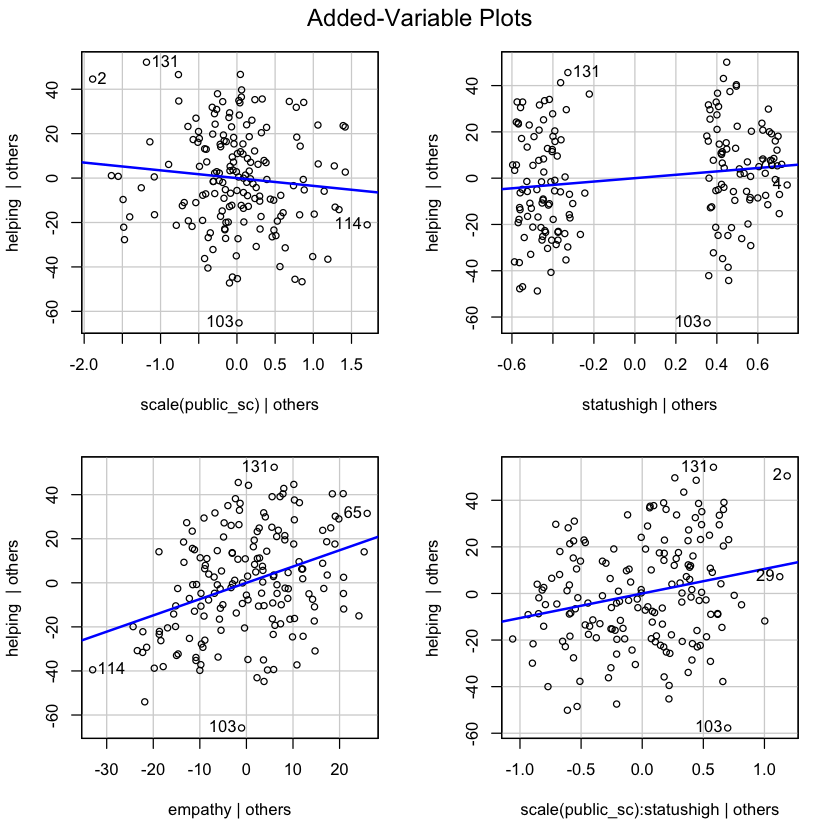

In [74]:
library(car)
avPlots(mod)

In [78]:
summary(lm(scale(helping) ~ status, data = helping))


Call:
lm(formula = scale(helping) ~ status, data = helping)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73766 -0.70655 -0.09683  0.73752  1.98321 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.1922     0.1041  -1.846  0.06662 . 
statushigh    0.4086     0.1518   2.692  0.00782 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9818 on 166 degrees of freedom
Multiple R-squared:  0.04184,	Adjusted R-squared:  0.03607 
F-statistic:  7.25 on 1 and 166 DF,  p-value: 0.007819


In [79]:
summary(lm(scale(helping) ~ empathy, data = helping))


Call:
lm(formula = scale(helping) ~ empathy, data = helping)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01691 -0.65267 -0.03413  0.62921  2.02464 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.296418   0.329699  -6.965 7.31e-11 ***
empathy      0.031909   0.004484   7.117 3.16e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.878 on 166 degrees of freedom
Multiple R-squared:  0.2338,	Adjusted R-squared:  0.2292 
F-statistic: 50.65 on 1 and 166 DF,  p-value: 3.158e-11


In [80]:
summary(lm(scale(helping) ~ empathy + status, data = helping))


Call:
lm(formula = scale(helping) ~ empathy + status, data = helping)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13949 -0.61254 -0.07061  0.60338  1.99294 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.349779   0.326929  -7.187 2.17e-11 ***
empathy      0.030721   0.004467   6.878 1.20e-10 ***
statushigh   0.295364   0.135204   2.185   0.0303 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8682 on 165 degrees of freedom
Multiple R-squared:  0.2553,	Adjusted R-squared:  0.2463 
F-statistic: 28.29 on 2 and 165 DF,  p-value: 2.735e-11


In [59]:
summary(mod2 <- lm(helping ~ scale(public_sc) * status, data = helping))


Call:
lm(formula = helping ~ scale(public_sc) * status, data = helping)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.885 -16.726  -0.607  17.828  52.431 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  43.864      2.793  15.703  < 2e-16 ***
scale(public_sc)             15.077      2.824   5.339 3.07e-07 ***
statuslow                    -7.042      3.827  -1.840  0.06757 .  
scale(public_sc):statuslow  -12.154      3.842  -3.163  0.00186 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.22 on 164 degrees of freedom
Multiple R-squared:  0.189,	Adjusted R-squared:  0.1742 
F-statistic: 12.74 on 3 and 164 DF,  p-value: 1.581e-07


In [60]:
anova(mod2, mod) |> print()

Analysis of Variance Table

Model 1: helping ~ scale(public_sc) * status
Model 2: helping ~ scale(public_sc) * status + empathy
  Res.Df   RSS Df Sum of Sq     F    Pr(>F)    
1    164 96189                                 
2    163 83862  1     12327 23.96 2.348e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


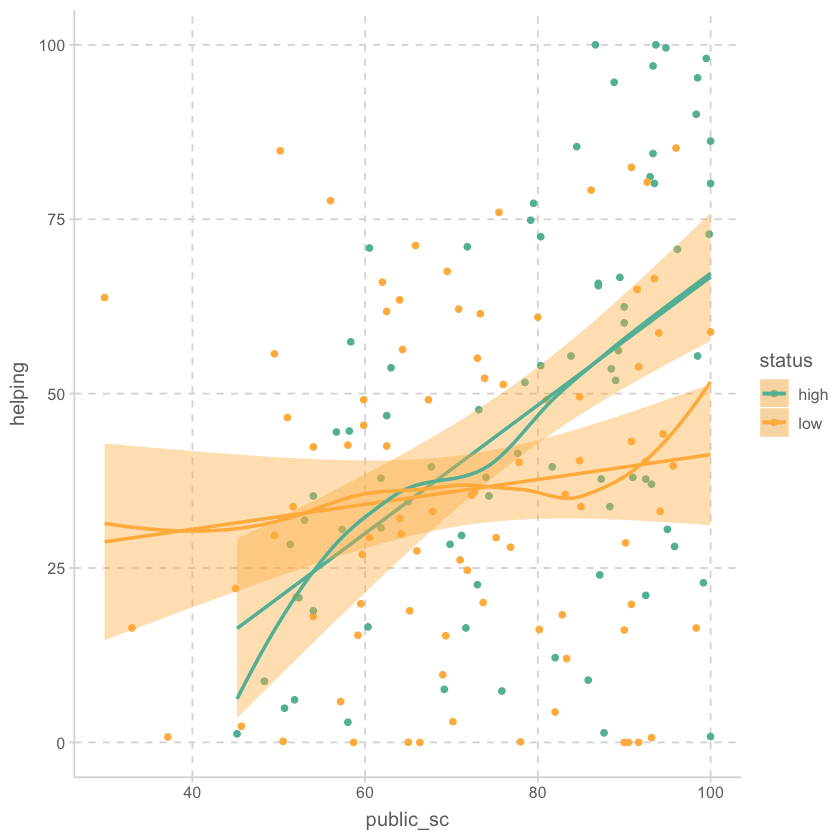

In [61]:
helping |>
    ggplot(aes(x = public_sc, y = helping, color = status)) +
    geom_point() +
    geom_smooth(method = lm) +
    geom_smooth(se = FALSE)

In [62]:
library(psych)
# R squared
corr.test(helping |> select(empathy:helping))$r^2 |>
    round(2) |>
    print()

          empathy public_sc helping
empathy      1.00      0.41    0.23
public_sc    0.41      1.00    0.12
helping      0.23      0.12    1.00


In [63]:
summary(lm(helping ~ scale(empathy) * scale(public_sc), data = helping))


Call:
lm(formula = helping ~ scale(empathy) * scale(public_sc), data = helping)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.326 -16.613  -0.074  16.524  53.692 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       39.644      2.070  19.151  < 2e-16 ***
scale(empathy)                    12.013      2.346   5.121 8.42e-07 ***
scale(public_sc)                   2.301      2.361   0.975   0.3312    
scale(empathy):scale(public_sc)    2.735      1.620   1.688   0.0932 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.3 on 164 degrees of freedom
Multiple R-squared:  0.2495,	Adjusted R-squared:  0.2358 
F-statistic: 18.17 on 3 and 164 DF,  p-value: 3.138e-10


In [64]:
summary(lm(helping ~ scale(empathy) * scale(public_sc) + scale(public_sc) * status, data = helping))


Call:
lm(formula = helping ~ scale(empathy) * scale(public_sc) + scale(public_sc) * 
    status, data = helping)

Residuals:
   Min     1Q Median     3Q    Max 
-66.40 -14.81  -1.10  16.81  48.70 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       43.100      2.853  15.109  < 2e-16 ***
scale(empathy)                    11.387      2.298   4.956  1.8e-06 ***
scale(public_sc)                   6.951      3.116   2.231  0.02706 *  
statuslow                         -6.980      3.603  -1.937  0.05445 .  
scale(empathy):scale(public_sc)    1.531      1.621   0.944  0.34637    
scale(public_sc):statuslow        -9.815      3.695  -2.656  0.00869 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.69 on 162 degrees of freedom
Multiple R-squared:  0.2968,	Adjusted R-squared:  0.2751 
F-statistic: 13.68 on 5 and 162 DF,  p-value: 3.876e-11


In [65]:
summary(lm(helping ~ status, data = helping))


Call:
lm(formula = helping ~ status, data = helping)

Residuals:
   Min     1Q Median     3Q    Max 
-46.31 -18.83  -2.58  19.66  52.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   47.147      2.944  16.016  < 2e-16 ***
statuslow    -10.890      4.045  -2.692  0.00782 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.17 on 166 degrees of freedom
Multiple R-squared:  0.04184,	Adjusted R-squared:  0.03607 
F-statistic:  7.25 on 1 and 166 DF,  p-value: 0.007819
